<a href="https://colab.research.google.com/github/takao8/MLTSA_JClifford/blob/master/HW3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
!pip install fbprophet

In [0]:
import fbprophet
from fbprophet import Prophet
from fbprophet import diagnostics

In [0]:
a = []
for mon in enumerate(['apr', 'may', 'jun', 'jul', 'aug', 'sep']):
  c = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-' + mon[1] + '14.csv')
  a.append(c)
a = pd.concat(a)

In [0]:
a["Date/Time"] = pd.to_datetime(a["Date/Time"])
#a = a["Date/Time"]

# Forming Count Data

Now we'll adjust the data to count the number of instances per day.

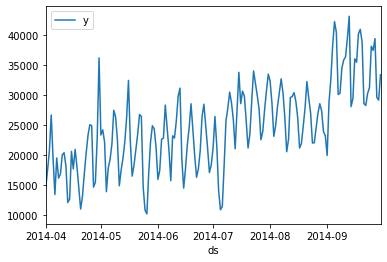

In [0]:
a = a.groupby(a["Date/Time"].dt.date).count()
a['ds'] = a.index
a = a.rename(columns={"Date/Time": "y"})
a = a.drop(columns=["Lat", "Lon", "Base"])
a.plot(x = "ds", y = "y")

Figure 1: Plot of the count of the number of uber rides over time, from April to September of 2014

# Standardizing the Data

And we'll standardize too, to finish our data preperation.

In [0]:
a["y"] = (a["y"] - a["y"].mean()) / a["y"].std()

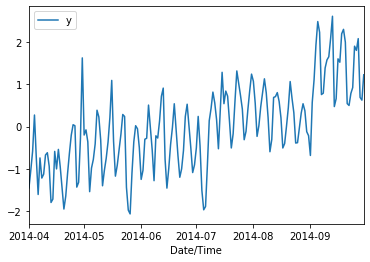

In [0]:
a.plot()

Figure 2: The standardized plot of Figure 1, subtracting its mean and dividing by its standard deviation.  Performed to prevent large numbers and to convert our values to floating point numbers instead of integers

# DATA ANALYSIS

## Model 1: Trends and Seasonality

In [0]:
simplem = Prophet()
simplem.fit(a)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = simplem.make_future_dataframe(periods=40)
forecast = simplem.predict(future)

In [0]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
218,2014-11-05,1.977357,1.287251,2.661588
219,2014-11-06,2.296539,1.639667,2.945280
220,2014-11-07,2.220377,1.523447,2.854323
221,2014-11-08,1.703405,1.055121,2.365921
222,2014-11-09,0.855040,0.185807,1.560516


This table illustrates our prediction (yhat), our lower bound error (yhat_lower), and our upper bound error (yhat_upper).

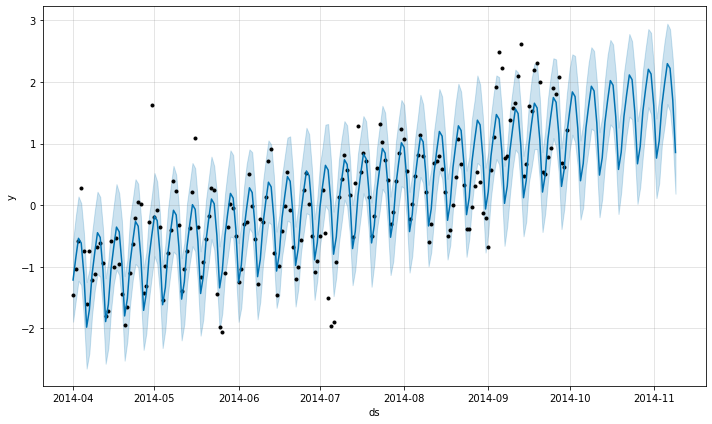

In [0]:
fig1 = simplem.plot(forecast)

Figure 3: Future forecast of our series, 40 days into the future.  The dark colored line is our prediction, while the light colored band represents the uncertainty in our prediction.

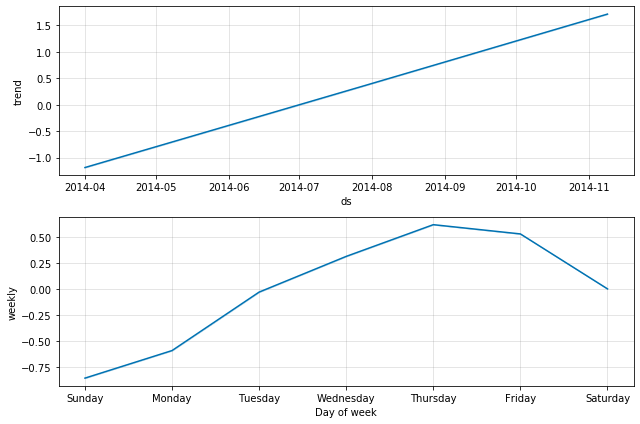

In [0]:
fig2 = simplem.plot_components(forecast)

Figure 4: Components of our forecast.  The top plot illustrates the increase in ridership over the course of 2014, while the bottom plot indicates the likelihood that people will take ubers on certain days of the week; lowest on Sundays, with a gradual increase to a peak on Thursdays.

# Model Validation of Model 1

In [0]:
diagnostics.cross_validation(simplem, horizon='5 days')

INFO:fbprophet:Making 65 forecasts with cutoffs between 2014-04-18 00:00:00 and 2014-09-25 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 13.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.
INFO:fbprophet:n_changepoints greater than number of observations.Using 21.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-04-19,-0.992905,-1.383305,-0.628020,-1.441595,2014-04-18
1,2014-04-20,-1.852382,-2.221085,-1.466030,-1.949481,2014-04-18
2,2014-04-21,-1.380159,-1.772216,-0.961549,-1.645599,2014-04-18
3,2014-04-22,-1.287506,-1.645141,-0.916307,-1.105412,2014-04-18
4,2014-04-23,-1.256395,-1.643303,-0.889818,-0.627844,2014-04-18
...,...,...,...,...,...,...
320,2014-09-26,1.638589,0.985524,2.315449,1.802925,2014-09-25
321,2014-09-27,1.089199,0.397282,1.764998,2.081164,2014-09-25
322,2014-09-28,0.261513,-0.346114,0.894718,0.691101,2014-09-25
323,2014-09-29,0.554586,-0.116825,1.238699,0.626642,2014-09-25
